In [2]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
pip install praw

     |████████████████████████████████| 188 kB 6.6 MB/s eta 0:00:01
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached websocket_client-1.4.1-py3-none-any.whl (55 kB)
  Using cached prawcore-2.3.0-py3-none-any.whl (16 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [84]:
import praw

reddit = praw.Reddit(client_id='4-j_R1izVVBJPEdEXOwRxA',
                     client_secret='XAWfjRyhWX7E_97OdE6Kuk-SYH-AzQ',
                     passwrod='johngocks0524',
                     user_agent='gocks01',
                     username='gocks01')

In [90]:
subreddit = reddit.subreddit('Microsoft')

In [91]:
for submission in subreddit.hot(limit=5):
    print(submission.title)

Microsoft: Official Support Thread
Personal devices at work and a fine line...
Microsoft Word inconsistent typing 'flow'
Does anyone know where to get this specific file for SOC 1, 2, 3 Reports of MS Cloud Services
“Find My Device” changes location every time I refresh


In [94]:
pip install wget

Using legacy 'setup.py install' for wget, since package 'wheel' is not installed.
    Running setup.py install for wget ... done
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [96]:
import wget
url = 'http://files.pushshift.io/reddit/submissions/RS_2017-11.xz'
fielname = wget.download(url)

HTTPError: HTTP Error 404: Not Found

: 

In [36]:
start_time = '2021-09-18'
end_time = '2021-10-18'

In [38]:
reddit.subreddit('politics').search('all')

In [63]:
headlines = set()

In [75]:
for submission in reddit.subreddit('Tesla').search(query='Tesla',time_filter = 'year'):
    headlines.add(submission.title)
    display.clear_output()
print(len(headlines))

192


In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Charging Tesla a cancellation fee. Thoughts ?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.296,
  'headline': 'New to me SUV: got rid of my Tesla for this 2008 LX570. Family road trips will no '
              'longer require hours at charging stations.',
  'neg': 0.087,
  'neu': 0.913,
  'pos': 0.0},
 {'compound': 0.3566,
  'headline': "So Tesla's creating the Kaylon. Got it.",
  'neg': 0.0,
  'neu': 0.708,
  'pos': 0.292}]


In [77]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Charging Tesla a cancellation fee. Thoughts ?
1,0.087,0.913,0.000,-0.2960,New to me SUV: got rid of my Tesla for this 20...
2,0.000,0.708,0.292,0.3566,So Tesla's creating the Kaylon. Got it.
3,0.000,1.000,0.000,0.0000,Dude left his Tesla in a garage for a month...
4,0.000,1.000,0.000,0.0000,CCS Combo 1 Adapter available in US Tesla shop


In [78]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Charging Tesla a cancellation fee. Thoughts ?,0
1,0.087,0.913,0.000,-0.2960,New to me SUV: got rid of my Tesla for this 20...,-1
2,0.000,0.708,0.292,0.3566,So Tesla's creating the Kaylon. Got it.,1
3,0.000,1.000,0.000,0.0000,Dude left his Tesla in a garage for a month...,0
4,0.000,1.000,0.000,0.0000,CCS Combo 1 Adapter available in US Tesla shop,0


In [79]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["So Tesla's creating the Kaylon. Got it.",
 '[OC] Breaking down Tesla’s revenue and profit sources',
 'Ford CEO Out To Convince Dealers To Offer Tesla-Like Selling Costs',
 'When do you think Tesla FSD Beta will solve intersections like this one (a busy intersection in Ethiopia with no traffic lights)?',
 '“Tesla used to dominate the electric vehicle scene in the Netherlands. In August 2022, China’s Lynk & Co 01 PHEV crossover won August’s best seller race there. Tesla nowhere in the Top 20 plugins. '
 'Volkswagen had 5 models in the Top 20.”-Facts Chaser 🌎 🐶 🤦🏻\u200d♂️ on Twitter']

Negative headlines:

['New to me SUV: got rid of my Tesla for this 2008 LX570. Family road trips will no longer require hours at charging stations.',
 "Does anyone else think Tesla will lose it's appeal once legacy manufacturers figure out how to properly build EVs?",
 'Tesla Megapack battery caught fire at PG&E substation in California',
 'Man gets temporarily suspended from Tiktok f

In [80]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    108
 1     45
-1     39
Name: label, dtype: int64
 0    56.2500
 1    23.4375
-1    20.3125
Name: label, dtype: float64


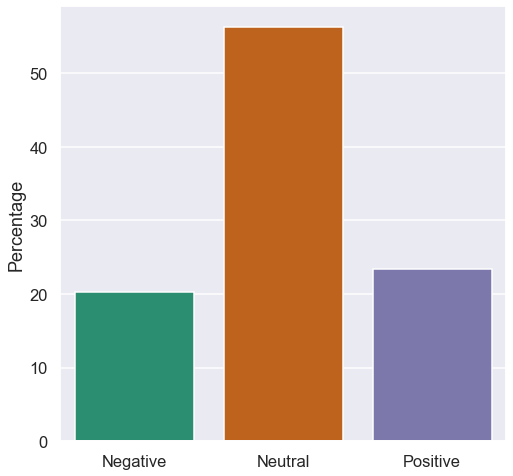

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [82]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [83]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [28]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [29]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [30]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('apple', 88),
 ('iphone', 50),
 ('pro', 47),
 ('14', 41),
 ('ios', 31),
 ('16', 27),
 ('app', 26),
 ('dynamic', 26),
 ('island', 25),
 ('new', 20),
 ('like', 16),
 ('feature', 14),
 ('support', 14),
 ('would', 10),
 ('battery', 10),
 ('music', 10),
 ('screen', 10),
 ('1', 9),
 ('best', 8),
 ('max', 8)]

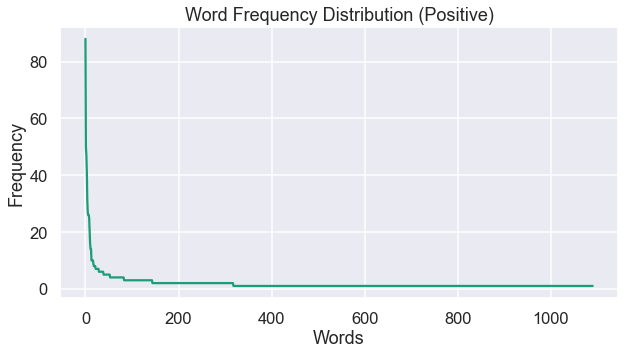

In [31]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

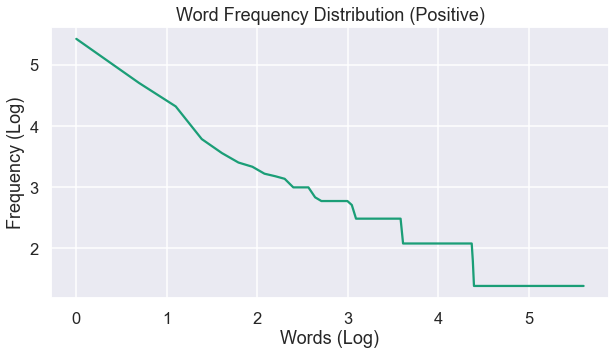

In [32]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [33]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

NameError: name 'df2' is not defined